#Image Classification  for The dog and cat dataset:
สร้าง Model ที่ใช้ในการจำแนกประเภทของภาพว่าเป็นภาพสุนัขหรือแมว  โดยจะใช้ dogs-vs-cats dataset ที่อยู่บน Kaggle (a computer-vision competition) (2013) ใน dataset ที่เราจะใช้ในการทดลองนี้จะเป็น version small จะมีภาพทั้งหมด 4,000 ตัวอย่าง (ภาพสุนัขและภาพแมวอย่างละ 2,000 ตัวอย่าง)  (This Exercise comes from Source: Deep Learning with Python Book)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing import image

##Data Collection
ทำการ download ไฟล์ dogs-vs-cats.zip ซึ่งประกอบไปด้วย ภาพสุนัข อยู่ใน training set 1,000 ภาพ cross validation set 500 ภาพ และ  test set 500 ภาพ และภาพแมวด้วยจำนวนเท่าๆกัน 

In [2]:
pip install gdown

In [3]:
!gdown --id 1JAv1zk6YuXs4ctwu34B1EOWawFFizgwR

Downloading...
From: https://drive.google.com/uc?id=1JAv1zk6YuXs4ctwu34B1EOWawFFizgwR
To: /content/dogs-vs-cats.zip
90.9MB [00:00, 147MB/s]


ทำการ unzip dogs-vs-cats.zip ด้วยคำสั่งต่อไปนี้ 

In [4]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
   creating: dogs-vs-cats/
  inflating: dogs-vs-cats/cat.0.jpg  
  inflating: dogs-vs-cats/cat.1.jpg  
  inflating: dogs-vs-cats/cat.10.jpg  
  inflating: dogs-vs-cats/cat.100.jpg  
  inflating: dogs-vs-cats/cat.1000.jpg  
  inflating: dogs-vs-cats/cat.1001.jpg  
  inflating: dogs-vs-cats/cat.1002.jpg  
  inflating: dogs-vs-cats/cat.1003.jpg  
  inflating: dogs-vs-cats/cat.1004.jpg  
  inflating: dogs-vs-cats/cat.1005.jpg  
  inflating: dogs-vs-cats/cat.1006.jpg  
  inflating: dogs-vs-cats/cat.1007.jpg  
  inflating: dogs-vs-cats/cat.1008.jpg  
  inflating: dogs-vs-cats/cat.1009.jpg  
  inflating: dogs-vs-cats/cat.101.jpg  
  inflating: dogs-vs-cats/cat.1010.jpg  
  inflating: dogs-vs-cats/cat.1011.jpg  
  inflating: dogs-vs-cats/cat.1012.jpg  
  inflating: dogs-vs-cats/cat.1013.jpg  
  inflating: dogs-vs-cats/cat.1014.jpg  
  inflating: dogs-vs-cats/cat.1015.jpg  
  inflating: dogs-vs-cats/cat.1016.jpg  
  inflating: dogs-vs-cats/cat.1017.jpg  
  inflating: 

In [ ]:
!rm -rvf cats_and_dogs_small

ทำการสร้าง directory ดังรูป ด้วยคำสั่งต่อไปนี้

In [5]:
import os, shutil

#Path to the directory where the original dataset was uncompressed
original_dataset_dir = '/content/dogs-vs-cats/'
#Directory where you’ll store your smaller dataset
base_dir = '/content/cats_and_dogs_small'
os.mkdir(base_dir)
#Directory for the training set
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
#Directory for the validation set
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
#Directory for the test set
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
#Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
#Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
#Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
#Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
#Directory with test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
#Directory with test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

ทำการ copy file รูปภาพจากภาพต้นฉบับมายัง directory ต่างๆ ด้วย code ต่อไปนี้

In [6]:
#Copies the first 1,000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

#Copies the next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

#Copies the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

#Copies the first 1,000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)
  
#Copies the next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

#Copies the next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [7]:
#count how many pictures are in each training split (train/validation/test):
print('total training cat images:', len(os.listdir(train_cats_dir))) #1000
print('total training dog images:', len(os.listdir(train_dogs_dir))) #1000
print('total validation cat images:', len(os.listdir(validation_cats_dir))) #500
print('total validation dog images:', len(os.listdir(validation_dogs_dir))) #500
print('total test cat images:', len(os.listdir(test_cats_dir))) #500
print('total test dog images:', len(os.listdir(test_dogs_dir))) #500

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


#Data Exploration and Preparation
ลองดูตัวอย่างภาพแรกใน test set 

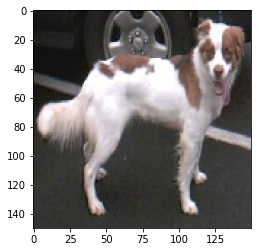

In [9]:
from keras.preprocessing import image

# let's see the first imgage in the test set
fname = 'dog.1500.jpg'
img_path = os.path.join(test_dogs_dir,fname)
#Reads the image and resizes it
img = image.load_img(img_path, target_size=(150, 150))
plt.imshow(img)

##Modeling
ทำการกำหนด Architecture ของ Model ด้วย convolution + pooling layer 4 ชั้น ก่อนนำมาผ่าน feed forward neural networks 

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import models
from tensorflow.keras import optimizers

## Part (1) - modify here to using architecure in slide 19 (use the same fully connected layers)
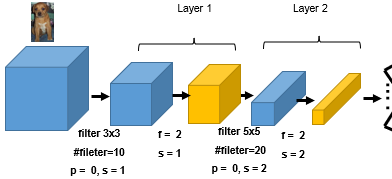 

In [ ]:
def build_model():
  model = models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
  input_shape=(150, 150, 3))) 
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  #model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

  return model

ลอง พิมพ์ model.summary() ดู จะได้ตารางด้านล่าง จากนั้นลองตรวจสอบจำนวน Parameter ดูว่าตรงตามทฤษฏีที่เรียนหรือไม่

In [ ]:
model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


สร้าง generator ที่จะใช้ในการ training และ evaluation
API -> https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) # rescale images
validation_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory(train_dir, # target directory
                                                    target_size=(150, 150), # resize images to 150x150 
                                                    batch_size=20, # there are 20 examples in each batch
                                                    classes = ['dogs', 'cats'], # Optional list of class subdirectories
                                                    class_mode='binary') # set to binary corresponding to binary_crossentropy

validation_generator = validation_datagen.flow_from_directory(validation_dir, 
                                                        target_size=(150, 150), 
                                                        batch_size=20,
                                                        #classes = ['dogs', 'cats'], # Optional list of class subdirectories
                                                        class_mode='binary') 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=50

In [ ]:
model.save('cats_and_dogs_small_1.h5')

# Model Evaluation

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

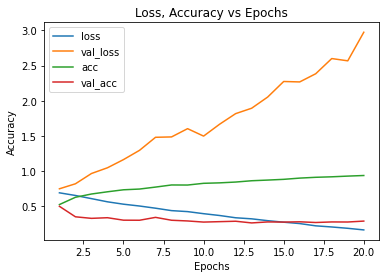

In [ ]:
#plot the learning curves
epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], label = 'loss')
plt.plot(epochs, history.history['val_loss'], label = 'val_loss')
plt.plot(epochs, history.history['acc'], label = 'acc')
plt.plot(epochs, history.history['val_acc'], label = 'val_acc')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Model Improvement

เนื่องจากใช้ data จำนวนน้อย มีโอกาสที่ Model จะ Overfit สูงลองเพิ่มจำนวน data ด้วย Data Augmentation 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=40, # Degree range for random rotations.
                             width_shift_range=0.2, # Randomly Shift horizontally left or right for 20% 
                             height_shift_range=0.2, # # Randomly Shift horizontally up or down for 20%
                             shear_range=20, # Shear angle in counter-clockwise direction in degrees
                             zoom_range=0.2, # Range for random zoom - [1-0.2, 1+0.2].
                             horizontal_flip=True, # Randomly choose whether to flip horizontally or not
                             fill_mode='nearest') # if set, some pixels in the image will be filled in

code ต่อไปนี้ ใช้ในการสร้าง image 4 ภาพ แบบ data augmentation 

## Part(2) - ลองเขียน code ในการ train ใหม่ด้วย Data Augmentation

In [ ]:
#good code to plot image from raw inage data 
from keras.preprocessing import image
import os

#fnames = [os.path.join(test_dogs_dir, fname) for fname in os.listdir(test_dogs_dir)]
#img_path = fnames[0]  

#Chooses the first image to augment
fname = 'dog.1500.jpg'
img_path = os.path.join(test_dogs_dir,fname)
#Reads the image and resizes it
img = image.load_img(img_path, target_size=(150, 150))
#Converts it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)
#Reshapes it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)
#Generates batches of randomly transformed images. Loops 
#indefinitely, so you need to break the loop at some point!
i = 0
# fits the model on batches with real-time data augmentation:
for batch in datagen.flow(x, batch_size=1):
  
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
plt.show()

ลอง train model ใหม่ โดยใช้ datagen สังเกตุผล

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(###Fil your code###)

validation_generator = validation_datagen.flow_from_directory(###Fil your code###)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model = build_model()

history = model.fit(###Fil your code###)

In [ ]:
model.save('cats_and_dogs_small_2.h5')

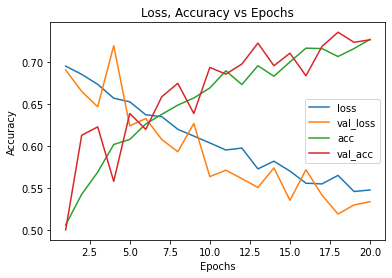

In [ ]:
#plot the learning curves
epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], label = 'loss')
plt.plot(epochs, history.history['val_loss'], label = 'val_loss')
plt.plot(epochs, history.history['acc'], label = 'acc')
plt.plot(epochs, history.history['val_acc'], label = 'val_acc')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=1,
                                                  class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
#evaluation
model.evaluate(test_generator)

[[0.]]


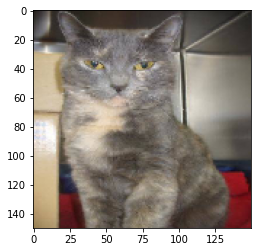

In [ ]:
#good code to plot image from raw inage data 
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

#Chooses the first image to augment
fname = 'cat.1992.jpg'
img_path = os.path.join(test_cats_dir,fname)
#Reads the image and resizes it
img = image.load_img(img_path, target_size=(150, 150))

plt.imshow(img)

#Converts it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

#Reshapes it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

print(model.predict(x))

ลองใส่ dropout ไปในทุก hidden layer แล้ว train ใหม่

In [ ]:
## การบ้าน